## **PRACTICAL SESSION 1** — Deep Learning for predictive maintenance

The dataset used is the **AI4I 2020** Predictive Maintenance Dataset, which contains 10,000 instances of industrial sensor data. Each instance represents the operating condition of a machine and is associated with a label indicating whether a failure has occurred and, if so, what type of failure it is.

The 5 possible labels are:



*   **TWF**: Tool Wear Failure
*   **HDF**: Heat Dissipation Failure
*   **PWF**: Power Failure
*   **OSF**: Overstrain Failure
*   **RNF**: Random Failure


The data is available on eCAMPUS as CSV file called: "ai4i2020.csv"



## **PRACTICAL SESSION Goal** — Ceate a deep leanring model allowing to realize a predictive maintenance mission

## **1 - Analysis of the dataset**



All libraries used ***SHOULD BE PLACED*** in the code cell below

> Ajouter une citation



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**QUESTION:** Load dataset and display some lines of the csv file.

In [5]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [6]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/ai4i2020.csv")
print(data.head())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

[texte du lien](https://)**QUESTION:** Display the distribution of machine



failures and non-failures with a bar graph.

<ipython-input-7-4602cf513cb0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=failure_counts.index, y=failure_counts.values, palette='viridis')


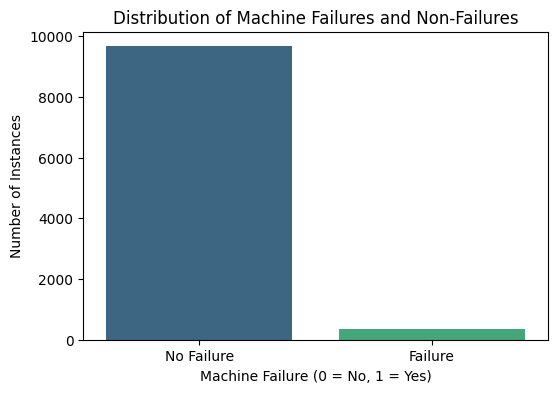

In [7]:
# 'Machine failure' column is usually a binary indicator (0 = no failure, 1 = failure)
failure_counts = data['Machine failure'].value_counts()

# Plot the distribution
plt.figure(figsize=(6,4))
sns.barplot(x=failure_counts.index, y=failure_counts.values, palette='viridis')

# Customize the plot
plt.title('Distribution of Machine Failures and Non-Failures')
plt.xlabel('Machine Failure (0 = No, 1 = Yes)')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], ['No Failure', 'Failure'])
plt.show()

**ANALYSIS QUESTION:** What do you observe?



the data is unbalanced


**ANALYSIS QUESTION:** What will be the consequence of this phenomenon on the model's learning?

If the dataset is unbalanced, the model might focus too much on the more common outcomes, like "no failure," and ignore the rare ones. This makes it less effective at predicting important failures that actually need attention.

**QUESTION:** Create a bar chart showing the distribution of different failure types (TWF, HDF, PWF, OSF, RNF). Display the exact values above each bar in the chart."

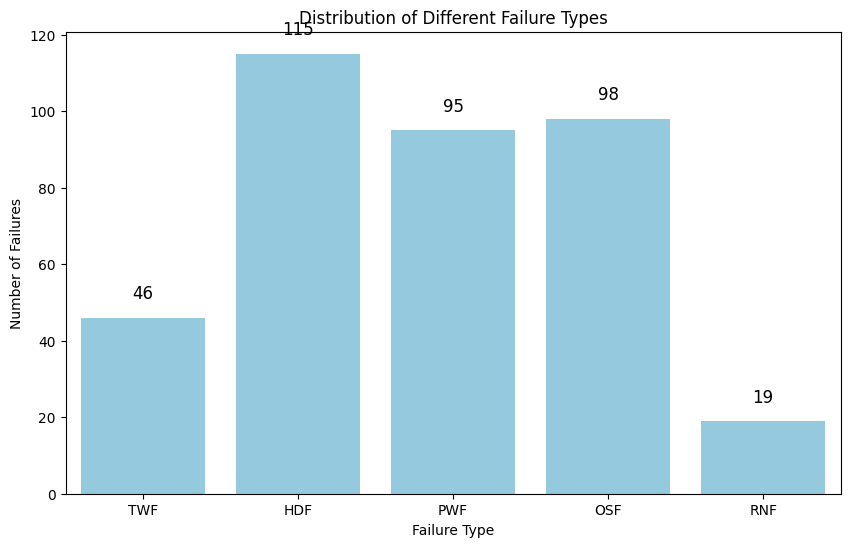

In [8]:
# List of failure types
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Sum the number of failures for each type
failure_counts = data[failure_types].sum()

# Create a bar chart with a fixed color
plt.figure(figsize=(10, 6))
sns.barplot(x=failure_counts.index, y=failure_counts.values, color="skyblue")  # Use color directly

# Add labels and title
plt.xlabel("Failure Type")
plt.ylabel("Number of Failures")
plt.title("Distribution of Different Failure Types")

# Display the exact values above each bar
for i, v in enumerate(failure_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=12)

# Show the plot
plt.show()

**ANALYSIS QUESTION:** What do you observe?

The dataset shows an imbalance, with PWF, HDF, and OSF being more common, while TWF and RNF are less frequent. This imbalance may lead to the model being biased toward predicting the more common failure types, potentially overlooking the rarer ones.

**QUESTION:** Create a bar chart showing the distribution of failure types (TWF, HDF, PWF, OSF, RNF) among machines that experienced a failure (Machine failure == 1). Additionally, add a "No Specific Failure" category to count cases where a machine failed but no specific failure type was recorded. Display the exact values above each bar in the chart."

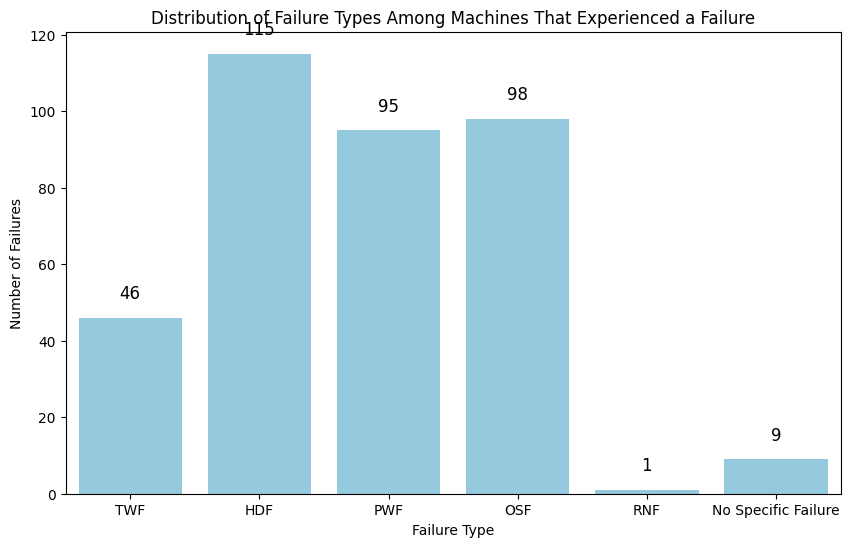

In [9]:


# Filter the dataset for machines that experienced a failure (Machine failure == 1)
failure_data = data[data['Machine failure'] == 1]
# List of failure types
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Sum the number of failures for each type where Machine failure is 1
failure_counts = failure_data[failure_types].sum()

# Add "No Specific Failure" category for cases where no specific failure type is recorded
no_specific_failure = (failure_data[failure_types].sum(axis=1) == 0).sum()
failure_counts['No Specific Failure'] = no_specific_failure

# Create a bar chart with a fixed color
plt.figure(figsize=(10, 6))
sns.barplot(x=failure_counts.index, y=failure_counts.values, color="skyblue")  # Use color directly

# Add labels and title
plt.xlabel("Failure Type")
plt.ylabel("Number of Failures")
plt.title("Distribution of Failure Types Among Machines That Experienced a Failure")

# Display the exact values above each bar
for i, v in enumerate(failure_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=12)

# Show the plot
plt.show()


**ANALYSIS QUESTION:** What do you obsrve comapred to the previous question ? What can you conclude?

**QUESTION:** Display the names of the different columns in the dataset with


their respective data types.

In [20]:

print(data.dtypes)


UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object


**ANALYSIS QUESTION:** To train the model, what will be the inputs and outputs (What are the names of the columns that you will use?)? Justify your response.
Remember, you want to predict if the machine will fail, and if so, what kind of failure. You need to yse previous results to jsurtify your response.

### **Inputs (Features):**

- **Air temperature [K]**, **Process temperature [K]**, **Rotational speed [rpm]**, **Torque [Nm]**, **Tool wear [min]**: Operational factors that may influence machine failure.

### **Outputs (Target):**
- **Machine failure**: (0 = no failure, 1 = failure).
- **TWF**, **HDF**, **PWF**, **OSF**, **RNF**

The features reflect operational conditions that affect machine performance, while the targets focus on predicting failure occurrence and the type of failure.

## **2- Train model Without balancing the dataset**

---



In this section, you must build and train a model without rebalancing the dataset.

**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

**QUESTION** Code below the model architecture

**QUESTION** Code below the algorithms allowing to train model

**WARNING!** You need to plot the training and test accuracy and loss to check if our model is overfitting

**QUESTION** Plot the confusion matrix and the classification report

**Tips:**

*   classification report link

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   Matrix confusion

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html





**ANALYSIS QUESTION** What do you observe? What can you conclude?

"Write your response here"

## **3- Train model With balancing the dataset**

---

 Methods for rebalancing a dataset:


*   Use oversampling techniques (e.g., SMOTE) to generate synthetic data for minority classes


> https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html



*   Apply undersampling techniques (e.g., random undersampling, Tomek Links, Edited Nearest Neighbors) to reduce the majority class size



> https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html



*   Use class weighting during model training to penalize errors on minority classes



> https://www.tensorflow.org/tutorials/structured_data/imbalanced_data?hl=fr


**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

**ANALYSIS QUESTION:** Explain the choices you made to balance the dataset.

"Write your response here"

**QUESTION:** Code below the model architecture


**TIP:** It could be interesting to keep it the same as before

**QUESTION** Code below the algorithms allowing to train model


**QUESTION** Plot the confusion matrix and the classification report

**ANALYSIS QUESTION** What do you observe? What can you conclude?

"Write your response here"